In [1]:
import numpy as np
import seaborn
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Create 2-dimensional latent field

In [118]:
n = 100
m = 100

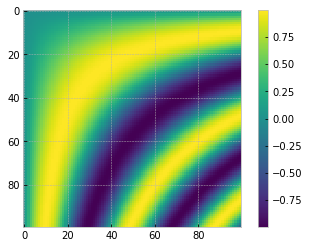

In [168]:
def func(x, y):
    return np.sin(y * x)

xaxis = np.linspace(0, 4, n)
yaxis = np.linspace(0, 4, m)
x, y = np.meshgrid(xaxis, yaxis)
result = func(x, y)

plt.imshow(result)
plt.colorbar()

In [169]:
latent_2d = np.zeros_like(result)

In [173]:
latent_2d[result > -0.5] = 1
latent_2d[result > 0.5] = 2
#latent_2d[0 >= result] = 1

In [174]:
np.unique(latent_2d)

array([ 0.,  1.,  2.])

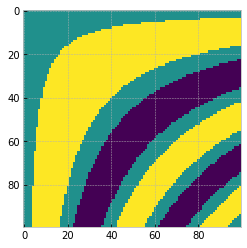

In [175]:
plt.imshow(latent_2d, interpolation="none")

### Sample

In [184]:
f = 4
c1 = scipy.stats.multivariate_normal([7.9, 7.5, 11, 3], np.eye(f) * 0.35)
c2 = scipy.stats.multivariate_normal([8, 7.9, 10.7, 2.9], np.eye(f) * 1.55)
c3 = scipy.stats.multivariate_normal([8.5, 9, 9, 1], np.eye(f) * 0.95)

In [185]:
obs = np.zeros((n,m,f))
np.shape(obs)

(100, 100, 4)

In [186]:
for i, x in enumerate(latent_2d[:,0]):
    for j, y in enumerate(latent_2d[0,:]):
        # generate a 2-d random vector at each point
        if latent_2d[i, j] == 0:
            obs[i,j,:] = c1.rvs()
        elif latent_2d[i, j] == 1:
            obs[i,j,:] = c2.rvs()
        elif latent_2d[i, j] == 2:
            obs[i,j,:] = c3.rvs()

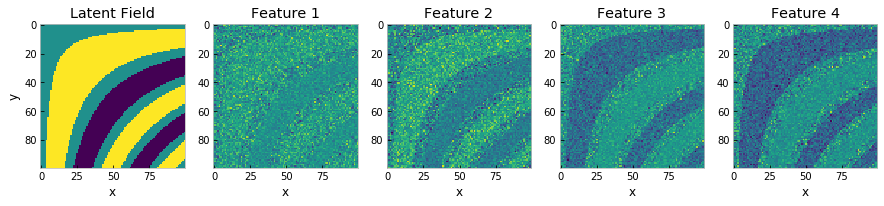

In [187]:
fig, ax = plt.subplots(ncols=5, figsize=(15,7))
for i in range(f+1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest")
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(obs[:,:,i-1], interpolation="nearest")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")
    

### Collapse into feature vector

In [188]:
feature_vector = np.array([obs[:,:,0].flatten(),obs[:,:,1].flatten(),obs[:,:,2].flatten(),obs[:,:,3].flatten()]).T
np.shape(feature_vector)

(10000, 4)

### Create coords vector

In [189]:
x,y = np.indices(np.shape(latent_2d))
xf = x.flatten()
yf = y.flatten()

coords_vector = np.array([xf, yf]).T
np.shape(coords_vector)

(10000, 2)

### BaySeg initialization

In [190]:
clf = bayseg.BaySeg(obs, 3)

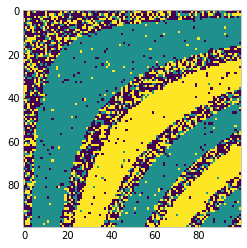

In [191]:
plt.imshow(clf.labels[-1].reshape(n,m))
plt.grid(False)

In [192]:
clf.fit(100)

  0%|                                                                                       | 0/100 [00:00<?, ?it/s]..\bayseg\bayseg.py:330: RuntimeWarning: overflow encountered in exp
  acc_ratio = np.exp(log_target_prop - log_target_prev)
100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [02:20<00:00,  1.40s/it]


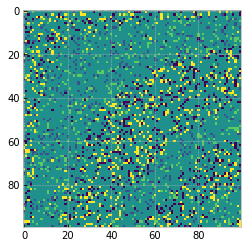

In [198]:
plt.imshow(clf.labels[51].reshape(100,100)-clf.labels[53].reshape(100,100))

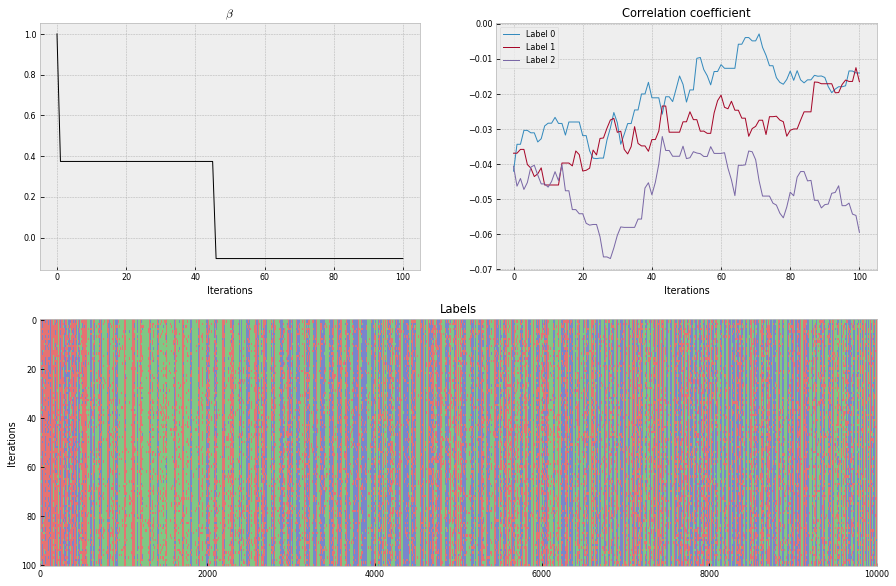

In [200]:
clf.diagnostics_plot()

In [14]:
debug

> c:\users\alexander\documents\git\bayseg\bayseg\bayseg.py(335)gibbs_sample()
    333             print("BETA acceptance ratio:", acc_ratio)
    334 
--> 335         if (acc_ratio > 1) or (np.random.uniform() < acc_ratio):
    336             self.betas.append(beta_prop)
    337         else:

ipdb> acc_ratio
array([[  8.28994330e+16,              nan,              nan,
                     nan],
       [             nan,   8.28994330e+16,              nan,
                     nan],
       [             nan,              nan,   8.28994330e+16,
                     nan],
       [             nan,              nan,              nan,
          8.28994330e+16]])
ipdb> exit


### Pseudocoloring in 2D with 4-stamp

In [12]:
e = 10

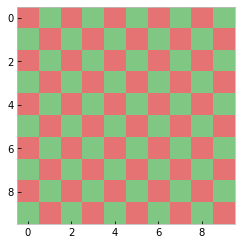

In [13]:
plt.imshow(np.tile(np.kron([[0, 1], [1, 0]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

### Pseudocoloring in 2D with 8-stamp

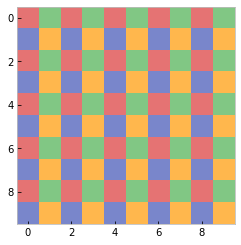

In [14]:
plt.imshow(np.tile(np.kron([[0, 1], [2, 3]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

In [18]:
np.shape(clf.colors)

(4, 25, 2)

### Gibbs energy calculation in 2D

In [17]:
labels = clf.labels[-1]
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

In [24]:
labels_rshp = labels.reshape(clf.shape[:-1])
labels_rshp

array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 1, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 1, 1, 2, 1, 2, 1, 2, 2],
       [1, 0, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 2, 2, 1, 2, 2, 2, 0, 2, 1]], dtype=int64)

In [27]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [41]:
ui = np.unravel_index(np.arange(100), (10,10))
ui

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9], dtype=int64))

In [42]:
np.ravel_multi_index(ui, (10,10))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [26]:
np.arange(100).reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [167]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

### Flattened Stamps

In [132]:
e_x = clf.shape[0]
e_y = clf.shape[1]
# right
r = 1
# left
l = -1
# up
u = -e_x
ur = -e_x + 1
ul = -e_x - 1
# down
d = +e_x
dr = +e_x + 1
dl = +e_x -1

In [201]:
# comparison array
comparer = np.tile(np.arange(clf.n_labels), (clf.shape[0] * clf.shape[1],1))

In [207]:
comparer[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]))

89

In [228]:
len(comparer[:ul, 0])

89

In [232]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]).astype(float) * beta)

89

In [233]:
len(gibbs[-ul:])

89

In [283]:
ul

-11

In [323]:
fshape = [ii for ii in fp.shape if ii > 0]

In [324]:
fshape

[3, 3]

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

In [456]:
grid = np.ones((10,10))
grid[:,::2] = 0
#grid[::2,:] = 2
storage_grid = np.ones((10,10))
grid

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

In [391]:
labels = clf.labels[-1]
labels_rshp = labels.reshape((10,10))
labels_rshp

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 2, 0, 0, 0],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 0, 0, 0, 0, 1, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 1, 2],
       [2, 1, 1, 2, 2, 2, 2, 2, 2, 0],
       [2, 1, 2, 2, 2, 2, 2, 1, 2, 2]], dtype=int64)

In [428]:
comp = np.tile(np.zeros_like(labels_rshp), (3,1,1))
for l in range(clf.n_labels):
    comp[l,:,:] = l
comp

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [504]:
np.not_equal?

In [527]:
np.not_equal(grid[1:-1,1:-1], grid[0:-2,1:-1])

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [528]:
np.not_equal(grid[1:-1,1:-1], grid[1:-1,0:-2])

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

(10, 10)

[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
  [ 1.  4.  4.  4.  4.  4.  4.  4.  4.  1.]
  [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  4.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  4.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  4.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  4.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]

 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
  [ 1.  4.  4.  4.  4.  4.  4.  4.  4.  1.]
  [ 1.  4.  0.  4.  4.  4.  4.  4.  4. 

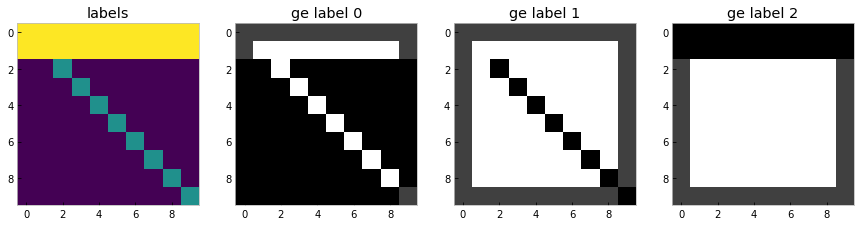

In [12]:
def gibbs_energy_2d(self, l, beta):
    gibbs_energy = np.tile(np.zeros_like(l).astype(float), (3,1,1))
    #print(gibbs_energy)
    
    # comparison array
    comp = np.tile(np.zeros_like(l), (3,1,1)).astype(float)
    
    for i in range(self.n_labels):
        comp[i,:,:] = i
        
    #print(comp)
    #print(np.not_equal(labels[1:-1,1:-1], comp[:,1:-1,0:-2]).astype(float))
    # center image
    
    # above
    gibbs_energy[:,1:-1,1:-1] += np.not_equal(l[1:-1, 1:-1], comp[:, :-2, 1:-1]).astype(float) * beta
    # below
    gibbs_energy[:,1:-1,1:-1] += np.not_equal(l[1:-1, 1:-1], comp[:, 2: , 1:-1]).astype(float) * beta
    # left
    gibbs_energy[:,1:-1,1:-1] += np.not_equal(l[1:-1, 1:-1], comp[:, 1:-1, :-2]).astype(float) * beta
    # right
    gibbs_energy[:,1:-1,1:-1] += np.not_equal(l[1:-1, 1:-1], comp[:, 1:-1, 2:]).astype(float) * beta
    
                                #(  np.not_equal(labels[1:-1, 1:-1], comp[:, 0:-2, 1:-1]).astype(float)  # above
                                #+ np.not_equal(labels[1:-1, 1:-1], comp[:, 2:, 1:-1]).astype(float)  # below
                                #+ np.not_equal(labels[1:-1, 1:-1], comp[:, 1:-1, 0:-2]).astype(float) # right
                                #+ np.not_equal(labels[1:-1, 1:-1], comp[:, 1:-1, 2:]).astype(float)) * beta # left

    # left column
    gibbs_energy[:,:,0] = np.not_equal(l[:,0], comp[:,:,1]).astype(float) * beta
    # right column
    gibbs_energy[:,:,-1] = np.not_equal(l[:,-1], comp[:,:,-2]).astype(float) * beta
    # top row
    gibbs_energy[:,0,:] = np.not_equal(l[0,:], comp[:,1,:]).astype(float) * beta
    # bottom row
    gibbs_energy[:,-1,:] = np.not_equal(l[-1,:], comp[:,-2,:]).astype(float) * beta

    return gibbs_energy

# call
test = np.eye(10,10)
test[:2] = 2
print(test)
ge = gibbs_energy_2d(clf, test, 1)
print(ge)
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(test)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)


In [597]:
test

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [35]:
import skimage.filters as filters

In [40]:
image

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [14]:
strct4 = np.array([[0,1,0],
                   [1,0,1],
                   [0,1,0]]).astype(bool)

strct8 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]).astype(bool)

In [15]:
def f(a, value):
    # print(a)
    a = a[a != -999.]
    # print(a)
    return np.count_nonzero(a != value)

In [16]:
img = np.eye(10)

In [17]:
ge = np.tile(np.zeros_like(img), (3,1,1))
#for i in range(clf.n_labels):
#    ge[i,:,:] = i

In [18]:
from functools import partial

In [19]:
beta = 1.

In [20]:
%%timeit
for i in range(clf.n_labels):
    ge[i,:,:] = scipy.ndimage.generic_filter(img, partial(f, value=i), footprint=strct4, mode="constant", cval=-999) * beta

2.36 ms ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
clf.shape

(10, 10, 4)

In [33]:
clf.feat.shape[0]

100

In [29]:
ge.reshape(100, 3)

array([[ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  1.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  2.,  1.],
       [ 4.,  2.,  4.],
       [ 4.,  4.,  4.],
       [ 4.,  4.,  3.],
       [ 3.,  2.,  4.],
       [ 2.,  4.

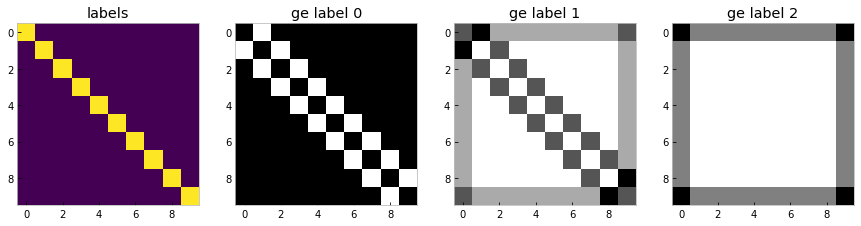

In [230]:
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(img)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)

In [146]:
scipy.ndimage.generic_filter?

In [80]:
image

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [34]:
import numpy as np
from skimage import util

image = np.eye(10)

windows = util.view_as_windows(image, (3, 3))
windows

array([[[[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  0.]],

        [[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0